In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

### Rense data (gjort av Ingeborg for oss😍)

In [37]:
data_frame = pd.read_csv("lego.population.csv", sep =",", encoding ="latin1")
# fjerner forklaringsvariabler vi ikke trenger
lego_set_data = data_frame[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages', 'Minifigures', 'Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter
lego_set_data = lego_set_data.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
lego_set_data['Theme'] = lego_set_data['Theme'].astype(str)
lego_set_data['Theme'] = lego_set_data['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
lego_set_data['Price'] = lego_set_data['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
lego_set_data['Price'] = lego_set_data['Price'].astype(float)

lego_set_data

,Set_Name,Theme,Pieces,Price,Pages,Minifigures,Unique_Pieces
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,1.0,52.0
16,Woody & RC,Disney,69.0,9.99,28.0,1.0,36.0
17,Mia's Summer Heart Box,Friends,85.0,7.99,36.0,1.0,41.0
18,Olivia's Summer Heart Box,Friends,93.0,7.99,40.0,2.0,48.0
19,Police Patrol Car,City,92.0,9.99,36.0,1.0,52.0
...,...,...,...,...,...,...,...
1171,1989 Batmobile,Batman,3306.0,249.99,404.0,3.0,484.0
1172,Tree House,Ideas,3036.0,199.99,428.0,4.0,482.0
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,13.0,692.0
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,6.0,525.0


### A. Unike brikker beskrevet av (totalt) antall brikker (Enkel lineær regresjon)

In [38]:
# enkel lineær regresjon
formel = 'Unique_Pieces ~ Pieces'

modell = smf.ols(formel, data = lego_set_data)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Unique_Pieces   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     2180.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          6.72e-219
Time:                        23:49:51   Log-Likelihood:                -3894.2
No. Observations:                 714   AIC:                             7792.
Df Residuals:                     712   BIC:                             7802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.7744      2.632     27.267      0.000      66.607      76.942
Pieces         0.1763      0.004     46.692      0.000       0.169       0.184
==============================================================================
Omnibus:                      276.678   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9691.463
Skew:                          -1.054   Prob(JB):                         0.00
Kurtosis:                      20.925   Cond. No.                         866.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

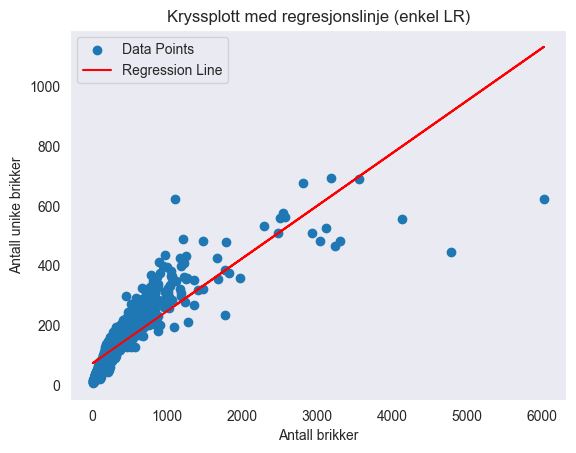

In [39]:
slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(lego_set_data['Pieces'])
regression_y = slope * regression_x + intercept

plt.scatter(lego_set_data['Pieces'], lego_set_data['Unique_Pieces'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Antall unike brikker')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

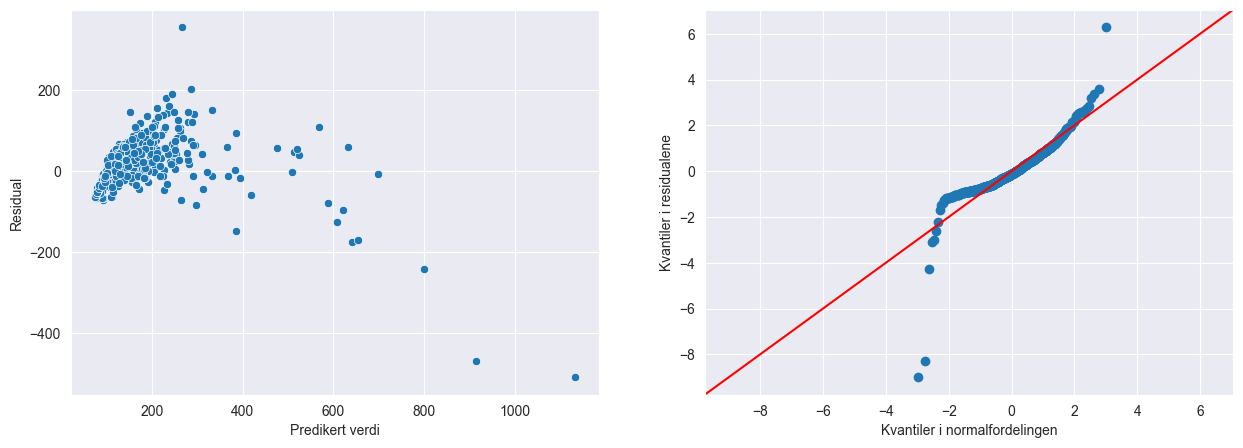

In [40]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()